### 1. Data preprocessing (converting, removing null and NaN values etc.)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('countries.csv', sep=';')
df = df.drop(index=0) # Remove data types row

# Drop null or NaN values
# df.dropna(axis=0, how='any')

C:\Users\Jacob\AppData\Local\Temp\ipykernel_4788\1275986503.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# Change data types
df['Country'] = df['Country'].astype('string')
num_cols = df.columns
num_cols = [x for x in num_cols if x != 'Country']
df[num_cols] = df[num_cols].astype(float)
df.dtypes

Country                                           string[python]
Area(sq km)                                              float64
Birth rate(births/1000 population)                       float64
Current account balance                                  float64
Death rate(deaths/1000 population)                       float64
Debt - external                                          float64
Electricity - consumption(kWh)                           float64
Electricity - production(kWh)                            float64
Exports                                                  float64
GDP                                                      float64
GDP - per capita                                         float64
GDP - real growth rate(%)                                float64
HIV/AIDS - adult prevalence rate(%)                      float64
HIV/AIDS - deaths                                        float64
HIV/AIDS - people living with HIV/AIDS                   float64
Highways(km)             

### 2. Data visualization

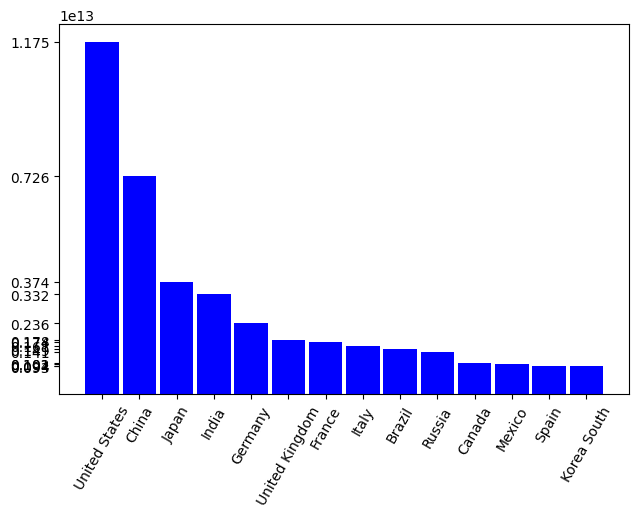

In [9]:
# Drop null values and sort
df_gdp_not_null = df.dropna(axis=0, subset=['GDP'])
chart_country_gdp = df_gdp_not_null.sort_values(by='GDP', ascending=False)
chart_country_gdp = chart_country_gdp.head(15)

# Delete European Union
eu = chart_country_gdp['Country'] == '#European Union'
chart_country_gdp = chart_country_gdp.drop(chart_country_gdp.index[eu])

chart_gdp = chart_country_gdp['GDP']
chart_countries = chart_country_gdp['Country'].to_list()

plt.bar(chart_countries, chart_gdp, color='blue', width=0.9)
plt.xticks(chart_countries, rotation=60)
plt.yticks(chart_gdp)
plt.subplots_adjust(left=0.01)
plt.show()